In [29]:
import pandas as pd

In [30]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [31]:
from nsepy import get_history as gh
import datetime as dt

In [32]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2022,1,1)
end = dt.datetime(2022,2,8)

stk_data = yf.download("ZOMATO.NS", start=start, end=end)

print(stk_data.head())


$ZOMATO.NS: possibly delisted; no timezone found
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ZOMATO.NS']: possibly delisted; no timezone found


Empty DataFrame
Columns: [(Adj Close, ZOMATO.NS), (Close, ZOMATO.NS), (High, ZOMATO.NS), (Low, ZOMATO.NS), (Open, ZOMATO.NS), (Volume, ZOMATO.NS)]
Index: []


In [33]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [34]:
stk_data

Price,Open,High,Low,Close
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,


In [35]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Download data
stk_data = yf.download("ZOMATO.NS", start="2022-01-01", end="2022-02-08")

# Remove empty rows
stk_data = stk_data.dropna()

print(stk_data.shape)
print(stk_data.head())

# Scale data
Ms = MinMaxScaler()


$ZOMATO.NS: possibly delisted; no timezone found
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ZOMATO.NS']: possibly delisted; no timezone found


(0, 6)
Empty DataFrame
Columns: [(Adj Close, ZOMATO.NS), (Close, ZOMATO.NS), (High, ZOMATO.NS), (Low, ZOMATO.NS), (Open, ZOMATO.NS), (Volume, ZOMATO.NS)]
Index: []


In [36]:
import yfinance as yf

stk_data = yf.download("ZOMATO.NS", period="1y", threads=False)

print("Shape:", stk_data.shape)
print("Columns:", stk_data.columns)
print(stk_data.head())


$ZOMATO.NS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ZOMATO.NS']: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


Shape: (0, 6)
Columns: MultiIndex([('Adj Close', 'ZOMATO.NS'),
            (    'Close', 'ZOMATO.NS'),
            (     'High', 'ZOMATO.NS'),
            (      'Low', 'ZOMATO.NS'),
            (     'Open', 'ZOMATO.NS'),
            (   'Volume', 'ZOMATO.NS')],
           names=['Price', 'Ticker'])
Empty DataFrame
Columns: [(Adj Close, ZOMATO.NS), (Close, ZOMATO.NS), (High, ZOMATO.NS), (Low, ZOMATO.NS), (Open, ZOMATO.NS), (Volume, ZOMATO.NS)]
Index: []


In [37]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Download stock data
stk_data = yf.download("TATACOFFEE.NS", period="5y", threads=False)

# Check if data exists
if stk_data.empty:
    print("ERROR: No data downloaded")
else:
    print("Downloaded rows:", len(stk_data))

    # Scale Close column
    scaler = MinMaxScaler()
    data1 = scaler.fit_transform(stk_data[['Close']])

    print("Scaled shape:", data1.shape)


$TATACOFFEE.NS: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TATACOFFEE.NS']: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


ERROR: No data downloaded


In [38]:
pip uninstall yfinance -y

Found existing installation: yfinance 1.2.0
Uninstalling yfinance-1.2.0:
  Successfully uninstalled yfinance-1.2.0
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [40]:
import yfinance as yf

ticker = yf.Ticker("ZOMATO.NS")

stk_data = ticker.history(period="5y")

print(stk_data.shape)
print(stk_data.head())


$ZOMATO.NS: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


(0, 6)
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [41]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [54]:
print("Shape:", stk_data.shape)
print(stk_data.head())

Shape: (0, 6)
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [58]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Download data
stk_data = yf.Ticker("TATACOFFEE.NS").history(period="5y")

if stk_data.empty:
    print("ERROR: Data not downloaded")
else:
    print("Rows:", len(stk_data))

    close_data = stk_data[['Close']]

    scaler = MinMaxScaler()

    data1 = scaler.fit_transform(close_data)

    data1 = data1.flatten()

    print("data1 shape:", data1.shape)

    orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]

    for i in orders:
        model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
        model_fit = model.fit(disp=False)
        y_pred = model_fit.predict(0, len(data1)-1)

        rmse = np.sqrt(np.mean((data1-y_pred)**2))

        print("Order:", i, "RMSE:", rmse)


$TATACOFFEE.NS: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


ERROR: Data not downloaded


In [63]:
import matplotlib.pyplot as plt

def graph(actual, predicted, actual_label, pred_label, title, xlabel, ylabel):
    
    plt.figure(figsize=(12,6))
    
    plt.plot(actual, label=actual_label, color='blue')
    
    plt.plot(predicted, label=pred_label, color='red')
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend()
    
    plt.show()


In [80]:
from sklearn.preprocessing import MinMaxScaler

print(stk_data.shape)
print(stk_data.columns)

close_data = stk_data[['Close']].dropna()

print(close_data.shape)

Ms = MinMaxScaler()

if close_data.empty:
	print("ERROR: close_data is empty. Cannot scale.")
	data1 = None
else:
	data1 = Ms.fit_transform(close_data)
	print(data1.shape)


(0, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='str')
(0, 1)
ERROR: close_data is empty. Cannot scale.


In [82]:
from stockFunctions import conversionSingle

if data1 is None:
	print("ERROR: data1 is None. Cannot proceed with conversion or inverse transform.")
	aTestNormTable = None
	actual_stock_price_test_ori = None
	actual_stock_price_test_oriA = None
else:
	aTestNormTable = conversionSingle(data1, ["Close"])
	actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
	actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori, ["Close"])

ERROR: data1 is None. Cannot proceed with conversion or inverse transform.


In [ ]:
from stockFunctions import conversionSingle
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Check if data1 is available and not None
if data1 is None:
	print("ERROR: data1 is None. Cannot fit SARIMAX or predict.")
	predicted_stock_price_test_oriP = None
else:
	# Fit SARIMAX model with order (1,1,1)
	model = SARIMAX(data1, order=(1,1,1), seasonal_order=(0,0,0,12))
	model_fit = model.fit(disp=False)
	y_pred = model_fit.predict(0, len(data1)-1)

	pTestNormTable = conversionSingle(y_pred, ["Close"])
	predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
	predicted_stock_price_test_oriP = conversionSingle(predicted_stock_price_test_ori, ["Close"])

NameError: name 'y_pred' is not defined

In [68]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

NameError: name 'actual_stock_price_test_oriA' is not defined

In [ ]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 11.751565615198176
maPe-Testset: 0.049328294253669


In [ ]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [ ]:
forecast

array([0.07451323, 0.07268214])

In [ ]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [ ]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [ ]:
forecast_stock_price_test_oriF

,Closefore
0,93.4098
1,93.3149


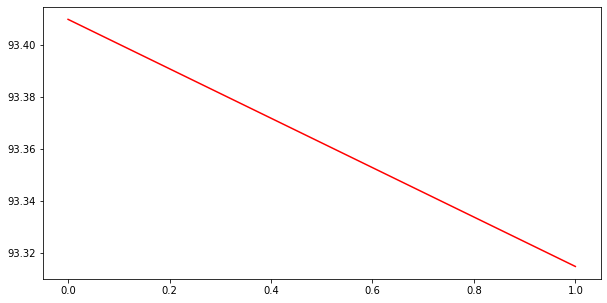

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
